In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import argparse
import sys
from time import time
from data import *
from GESU_net import *
from predict_utils import *
import shutil

/Users/zhhh/opt/anaconda3/lib/python3.8/site-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.16) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [19]:
train_path = '/Users/zhhh/Desktop/Research/seg_Astrocyte/DATA/image_train_256'
train_label = '/Users/zhhh/Desktop/Research/seg_Astrocyte/DATA/mask_train_256'
test_path = '/Users/zhhh/Desktop/Research/seg_Astrocyte/DATA/image_test_256'
test_label = '/Users/zhhh/Desktop/Research/seg_Astrocyte/DATA/mask_test_256'
epochs = 10
batches = 10
model_path = '/Users/zhhh/AstrocyteSegmentation-1'

In [3]:
#train
GESU_net = myGESUnet(img_rows = 256, img_cols= 256, train_path=train_path, train_label=train_label, test_path=test_path, test_label=test_label)
GESU_net.load_data()
GESU_net.train(epochs, batches, model_path)

In [ ]:
#test and predict
model = myGESUnet(img_rows = 256, img_cols= 256, train_path=train_path, train_label=train_label, test_path=test_path, test_label=test_label)
imgs_train, imgs_mask_train, imgs_test = model.load_data()
model = model.get_gesunet()
model.load_weights(os.path.join(model_path, "Model_GESU_oct17.hdf5"))
imgs_mask_test = model.predict(imgs_test[:,:,:,0], batch_size=1, verbose=1)
np.save('imgs_mask_test.npy', imgs_mask_test)

#save predicted mask
name = glob.glob(test_path+'/*.png')
shutil.rmtree('./temp_mask')
os.makedirs('./temp_mask')
print("array to image")
imgs = np.load('imgs_mask_test.npy')
for i in range(imgs.shape[0]):
    img = array_to_img(imgs[i])
    img_name = name[i]
    img_name = img_name[img_name.rindex("/") + 1:]
    img.save("/Users/zhhh/AstrocyteSegmentation-1/temp_mask/" + img_name)

#convert predicted grayscale image to binary mask
img_path = '/Users/zhhh/AstrocyteSegmentation-1/temp_mask/'
biimg_path = '/Users/zhhh/AstrocyteSegmentation-1/temp_bi/'
to_binary(img_path, biimg_path)

#post process
img_path = '/Users/zhhh/AstrocyteSegmentation-1/temp_bi/'
tar_path = '/Users/zhhh/AstrocyteSegmentation-1/pred_mask/'
post_process(img_path, tar_path)

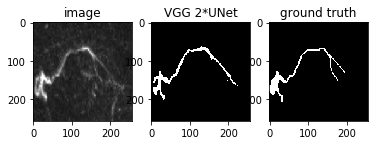

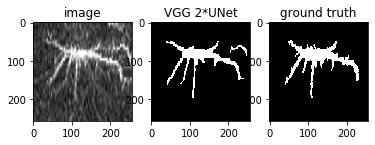

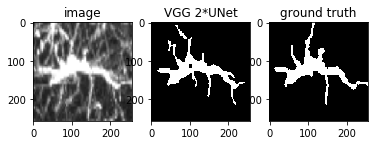

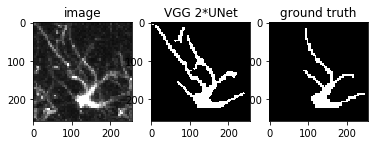

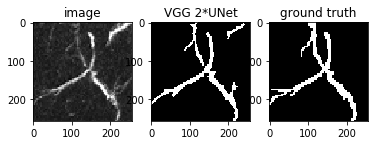

In [17]:
#show prediction samples
num_imgs = 5
show_pred(test_path, test_label, tar_path, num_imgs)

In [18]:
#show dice loss of test set
diceT = dice(tar_path,test_label)
mse = mse_loss(tar_path,test_label)

0.png
dice loss: 0.80256438118005
1.png
dice loss: 0.7310763334397956
2.png
dice loss: 0.7739303482587064
3.png
dice loss: 0.7562991332392662
4.png
dice loss: 0.7618041339232648
5.png
dice loss: 0.81927303465765
6.png
dice loss: 0.7239919950132869
7.png
dice loss: 0.7564547206165704
8.png
dice loss: 0.7266716880073646
9.png
dice loss: 0.855627065576622
10.png
dice loss: 0.7445145776976255
11.png
dice loss: 0.8091922946941534
12.png
dice loss: 0.6640599543825351
13.png
dice loss: 0.7789244186046511
14.png
dice loss: 0.7453096890259573
15.png
dice loss: 0.7993680884676145
16.png
dice loss: 0.7142857142857143
17.png
dice loss: 0.8093393361951629
18.png
dice loss: 0.8026593664450528
19.png
dice loss: 0.8055555555555556
20.png
dice loss: 0.6397893030794165
21.png
dice loss: 0.8467932585983375
22.png
dice loss: 0.7490718497488534
23.png
dice loss: 0.7501006684384312
24.png
dice loss: 0.8155026241421074
25.png
dice loss: 0.6254221261650682
26.png
dice loss: 0.8535405165951067
27.png
dice loss

In [ ]:
#predict all images
images_path = '/Users/zhhh/Desktop/Research/Astrocyte/New_Astrocyte/single_cell_256'
mask_path = '/Users/zhhh/Desktop/Research/Astrocyte/New_Astrocyte/single_cell_256_mask'
temp = '/Users/zhhh/Desktop/Research/Astrocyte/New_Astrocyte/temp_mask'
pred_dir = os.listdir(images_path)
for dir in pred_dir:
    patches_path = os.path.join(images_path, dir)
    model = myGESUnet(img_rows = 256, img_cols= 256, train_path=train_path, train_label=train_label, test_path=patches_path, test_label=test_label)
    imgs_train, imgs_mask_train, imgs_test = model.load_data()
    model = model.get_gesunet()
    model.load_weights(os.path.join(model_path, "Model_GESU_oct26_DATA2.hdf5"))
    imgs_mask_test = model.predict(imgs_test[:,:,:,0], batch_size=1, verbose=1)
    np.save('imgs_mask_test.npy', imgs_mask_test)

    #save predicted mask
    name = glob.glob(patches_path+'/*.png')
    shutil.rmtree(temp)
    os.makedirs(temp)
    print("array to image")
    imgs = np.load('imgs_mask_test.npy')
    for i in range(imgs.shape[0]):
        img = array_to_img(imgs[i])
        img_name = name[i]
        img_name = img_name[img_name.rindex("/") + 1:]
        img.save(os.path.join(temp, img_name))

    #convert predicted grayscale image to binary mask
    img_path = temp
    biimg_path = '/Users/zhhh/Desktop/Research/Astrocyte/New_Astrocyte/temp'
    shutil.rmtree(biimg_path)
    os.makedirs(biimg_path)
    to_binary(img_path, biimg_path)
    #post process
    img_path = biimg_path
    tar_path = os.path.join(mask_path, dir)
    post_process(img_path, tar_path)
    
